In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Define some useful functions

#### Functions for cleaning

In [4]:
def split_semicolon_in_rows(data: pd.DataFrame, column: str):
    expanded_rows = []
    for _, row in data.iterrows():
        if not pd.isnull(row[column]):
            if ';' in row[column]:
                split_strings = row[column].split('; ')
                for string in split_strings:
                    split_row = row.copy()
                    split_row[column] = string
                    expanded_rows.append(split_row)
            else:
                expanded_rows.append(row)
    return pd.DataFrame(expanded_rows)

#### Functions for visualization

In [6]:
def draw_simple_bar_plot(data: pd.DataFrame, column: str, title: str, xlabel: str, ylabel: str, rotation_value = 0):
    sources_counts = data[column].value_counts()
    plot = plt.bar(sources_counts.index, sources_counts.values, color=sns.color_palette('viridis', len(sources_counts)))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation_value)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    return plot

In [7]:
def scatterplot_X_vs_Y(data: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str, 
                       show_text_if_more_than_x=0, show_text_if_more_than_y=0, ishue=False, islegend=False, legend_title='', hue=''):
    if ishue:
        plot = sns.scatterplot(data=data, 
                x=x, 
                y=y,
                hue=hue, 
                palette='viridis', 
                alpha=0.7)
    else:
        plot = sns.scatterplot(data=data, 
                x=x, 
                y=y,  
                alpha=0.7)
    
    for i, row in df_datasets.iterrows():
        if (row[y] > show_text_if_more_than_y and 
            row[x] > show_text_if_more_than_x):
            plt.text(
                row[x], 
                row[y], 
                str(row['Dataset']), 
                fontsize=8, 
                alpha=0.7
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if islegend:
        plt.legend(title=legend_title)
    plt.grid(True)
    return plot

In [8]:
def scatterplot_X_vs_Y_in_range(data: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str, 
                                lower_boundery: int, upper_boundery: int, ishue=False, islegend=False, legend_title='', hue=''):
    filtered_data = data[(data[x] >= lower_boundery) & (data[x] <= upper_boundery)]
    
    if ishue and hue in data.columns:
        scatter = sns.scatterplot(data=filtered_data, x=x, y=y, hue=hue, palette='viridis')
    else:
        scatter = sns.scatterplot(data=filtered_data, x=x, y=y, color='blue')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if 'Dataset' in filtered_data.columns:
        for _, row in filtered_data.iterrows():
            plt.text(row[x], row[y], str(row['Dataset']), fontsize=8, alpha=0.7)

    if islegend and ishue:
        plt.legend(title=legend_title)
    else:
        plt.legend([], [], frameon=False)  # Hide legend if not needed
    plt.grid(True)
    return scatter

In [9]:
def draw_stacked_simple_plot(data: pd.DataFrame, x: str, y: str, hue: str, title: str, xlabel: str, ylabel: str):
    plt.figure(figsize=(6, 15))
    
    plot = sns.barplot(x=x, y=y, hue=hue, data=data, estimator=sum, dodge=False, errorbar=None, palette="Set2")
    
    plt.yscale("log")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=30)
    return plot

### Function for processing data

In [11]:
def extract_by_features(data: pd.DataFrame, features: list, value_features: list, list, not_null_features: list = None) -> pd.DataFrame:
    assert len(features) == len(value_features)
    mask = pd.Series([True] * len(data))
    
    for feature, value in zip(features, value_features):
        mask &= (data[feature] == value)

    if not_null_features is not None:
        not_null_mask = pd.Series([False] * len(data))
        for feature in not_null_features:
            not_null_mask |= data[feature].notnull()
        mask &= not_null_mask
    
    return data[mask]

### Learn Data

In [13]:
df_datasets = pd.read_csv('datasets.csv', delimiter=';', quotechar='"')

In [14]:
print("Basic Info:\n")
print(df_datasets.info())

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 27 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Dataset                                                                                       50 non-null     object
 1   Number of citations (Google Scholar)                                                          50 non-null     object
 2   Number of Papers (Papers with code since 2020)                                                50 non-null     object
 3   Number of Evaluations (Papers with code API)                                                  50 non-null     object
 4   Music/Speech/Sounds                                                                           50 non-null     object
 5   Link                     

In [16]:
# set up numeric columns
numeric_columns = ['Number of citations (Google Scholar)', 'Number of Papers (Papers with code since 2020)', 
                   'Number of Evaluations (Papers with code API)', 'Score or best score in Paper', 'Size (Hours)', 
                   'Number of Benchmarks (Audio Classification or Recognition Papers with Code different models)',
                   'Best Scoure']

df_datasets[numeric_columns] = df_datasets[numeric_columns].replace({',':'.'}, regex=True)
df_datasets[numeric_columns] = df_datasets[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [19]:
# top 5 most cited datasets
most_cited = df_datasets.nlargest(5, 'Number of citations (Google Scholar)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar)']])

# top 5 most used datasets
most_used = df_datasets.nlargest(5, 'Number of Papers (Papers with code since 2020)')
print("\nTop 5 Most Used Datasets:\n")
print(most_used[['Dataset', 'Number of Papers (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)

# datasets by original usecase
orinal_use_case = df_datasets['Original Use Case'].value_counts()
print("\nDatasets by Usecase:\n")
print(orinal_use_case)

# comment why good or bad downloadable
comment_for_downloadable = df_datasets['Download Comment'].value_counts()
print("\nDownload Comments:\n")
print(comment_for_downloadable)


Top 5 Most Cited Datasets:

                                              Dataset  \
5                                         LibriSpeech   
39                                            IEMOCAP   
0                                            AudioSet   
20  EmoDB Dataset (Berlin Database of Emotional Sp...   
34  RAVDESS (Ryerson Audio-Visual Database of Emot...   

    Number of citations (Google Scholar)  
5                                 7494.0  
39                                4124.0  
0                                 3950.0  
20                                3072.0  
34                                2154.0  

Top 5 Most Used Datasets:

         Dataset  Number of Papers (Papers with code since 2020)
5    LibriSpeech                                          1922.0
0       AudioSet                                           591.0
39       IEMOCAP                                           558.0
10     VoxCeleb1                                           490.0
8   Common Voice 

### Spit Data

In [27]:
df_datasets_clean_with_duplicates = split_semicolon_in_rows(df_datasets, 'Music/Speech/Sounds')
df_datasets_clean_with_duplicates = split_semicolon_in_rows(df_datasets_clean_with_duplicates, 'Download Comment')
df_datasets_clean_with_duplicates = split_semicolon_in_rows(df_datasets_clean_with_duplicates, 'Source')

### Explore Data and Visualization

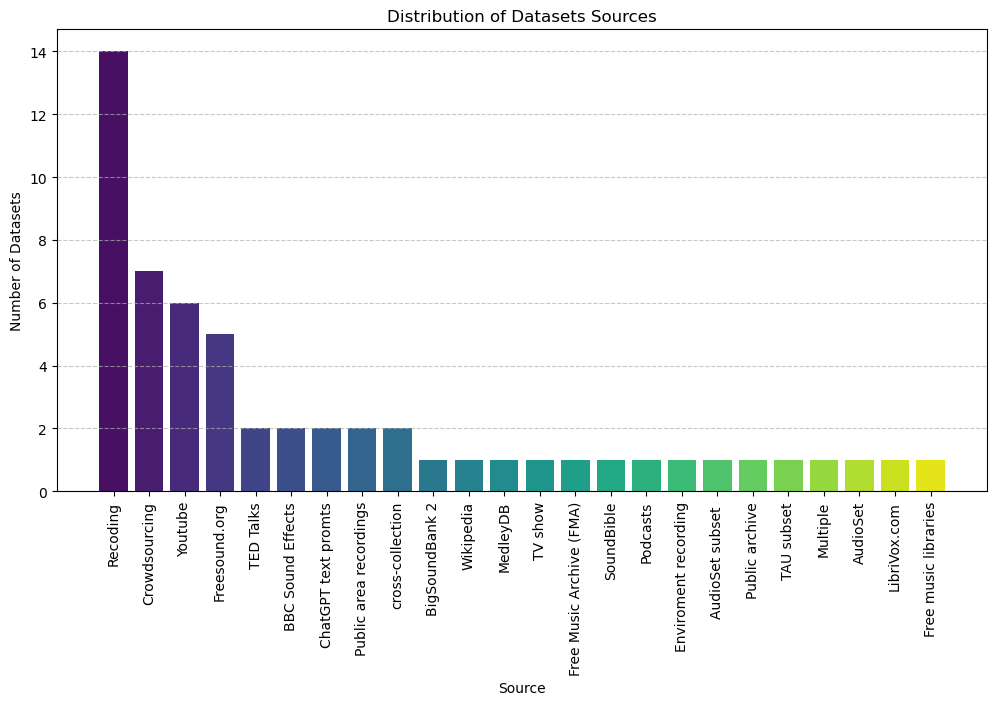

In [31]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_clean_with_duplicates, 'Source', 'Distribution of Datasets Sources', 'Source', 'Number of Datasets', 90)

plt.show()

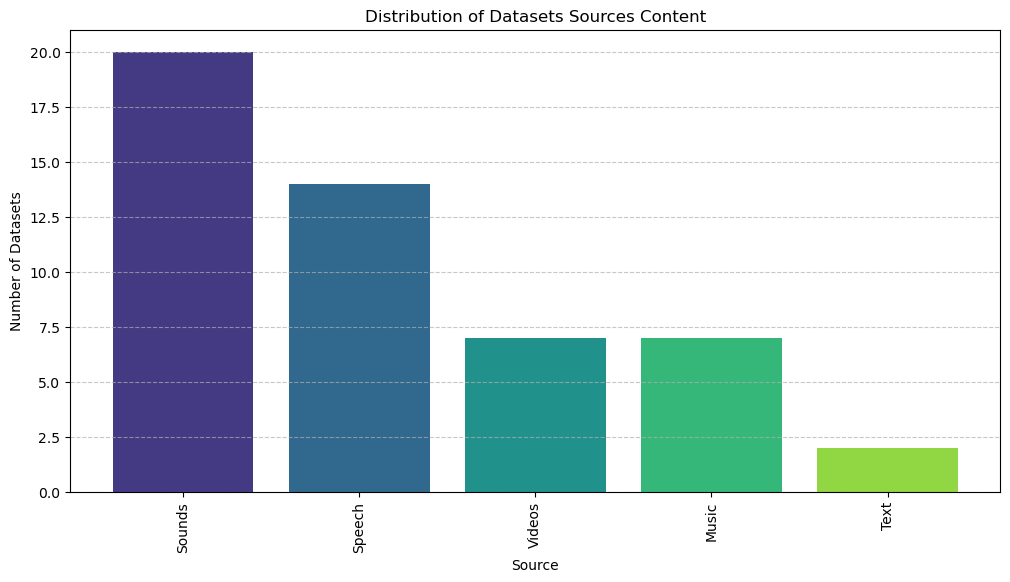

In [32]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets, 'Category Source', 'Distribution of Datasets Sources Content', 'Source', 'Number of Datasets', 90)

plt.show()

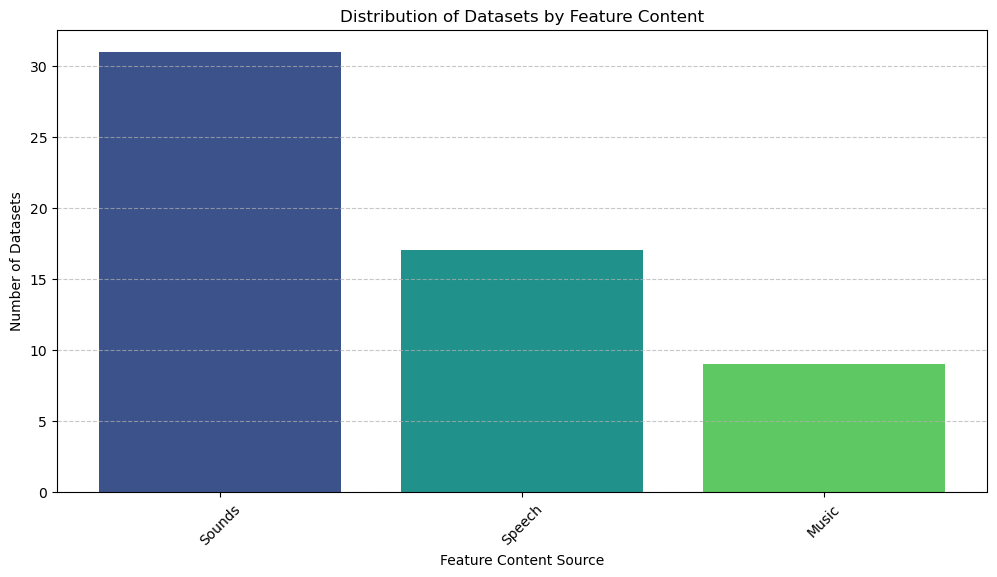

In [33]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets_clean_with_duplicates, 'Music/Speech/Sounds', 'Distribution of Datasets by Feature Content', 'Feature Content Source', 'Number of Datasets', 45)

plt.show()

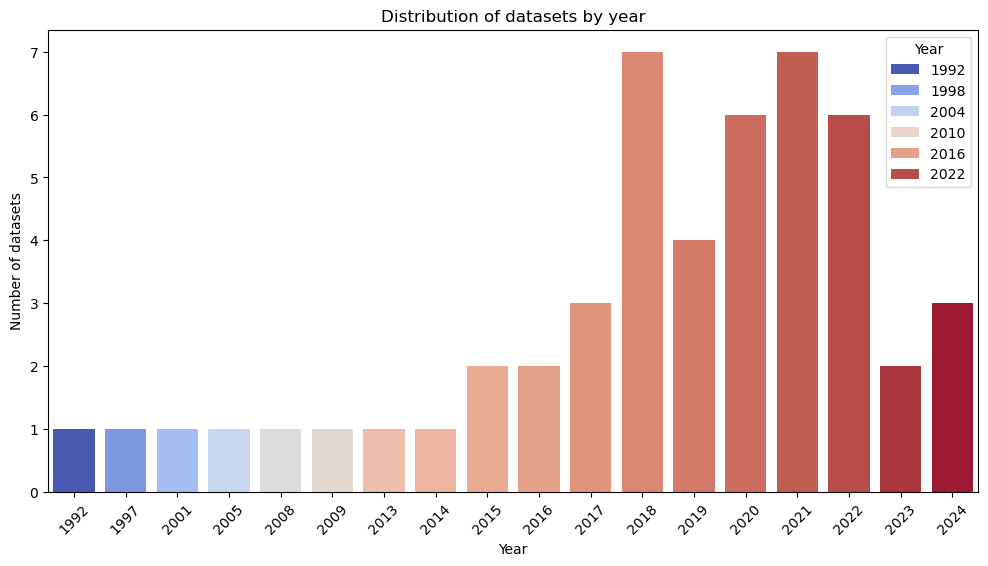

In [35]:
plt.figure(figsize=(12, 6))

sns.countplot(df_datasets, x='Year', palette='coolwarm', hue='Year', order=sorted(df_datasets['Year'].dropna().unique()))
plt.title('Distribution of datasets by year')
plt.xlabel('Year')
plt.ylabel('Number of datasets')
plt.xticks(rotation=45)
plt.show()

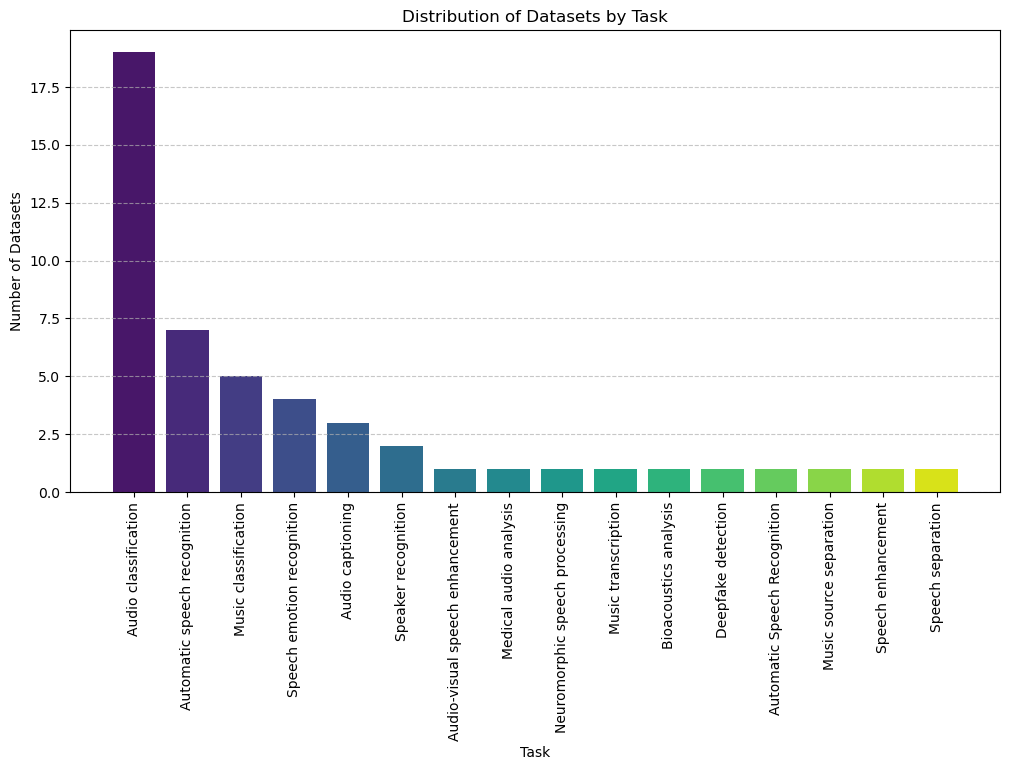

In [36]:
plt.figure(figsize=(12, 6))

plot = draw_simple_bar_plot(df_datasets, 'Original Use Case', 'Distribution of Datasets by Task', 'Task', 'Number of Datasets', 90)

plt.show()

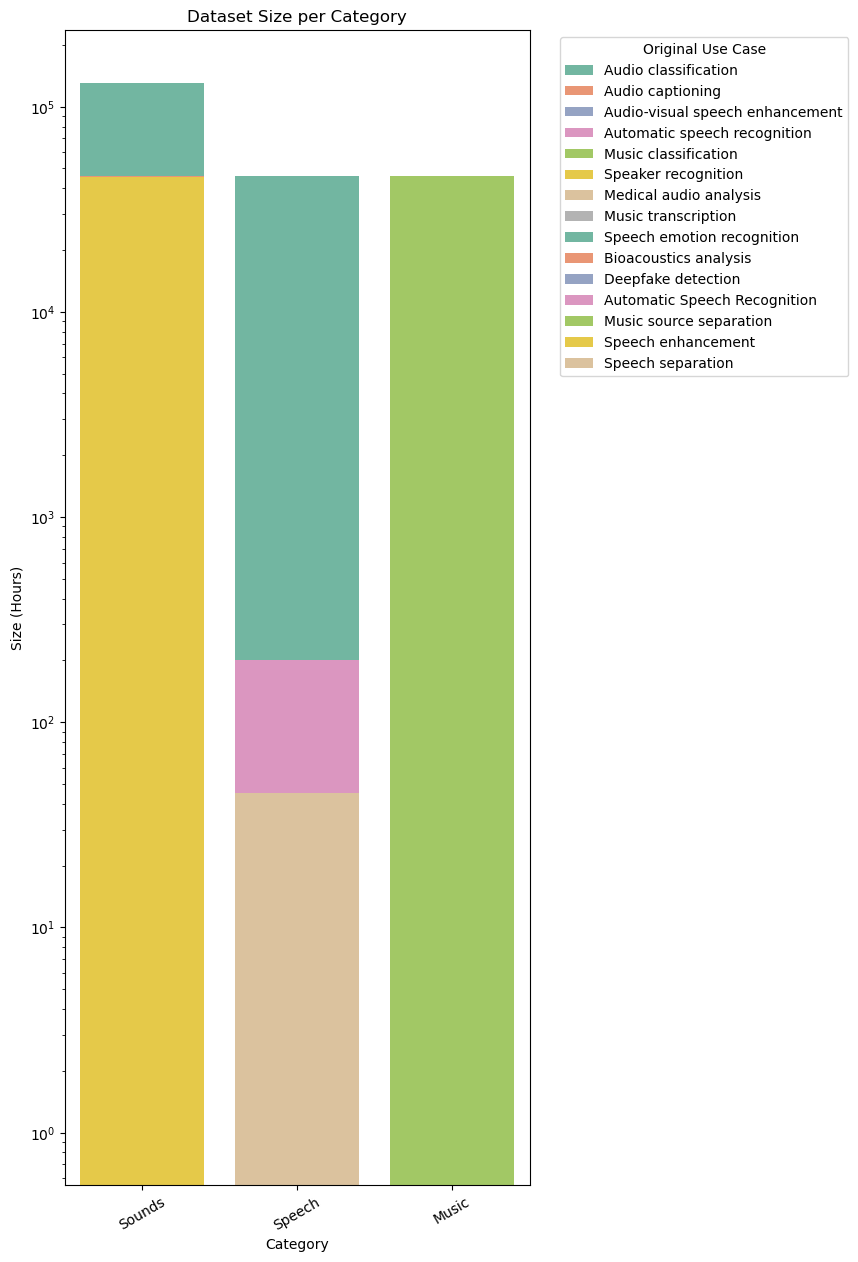

In [37]:
df_datasets_without_na_hours = df_datasets.dropna(subset=['Dataset', 'Original Use Case', 'Music/Speech/Sounds', 'Size (Hours)'])

draw_stacked_simple_plot(df_datasets_without_na_hours, 'Music/Speech/Sounds', 'Size (Hours)', 'Original Use Case', 
                         'Dataset Size per Category', 'Category', 'Size (Hours)')

plt.show()


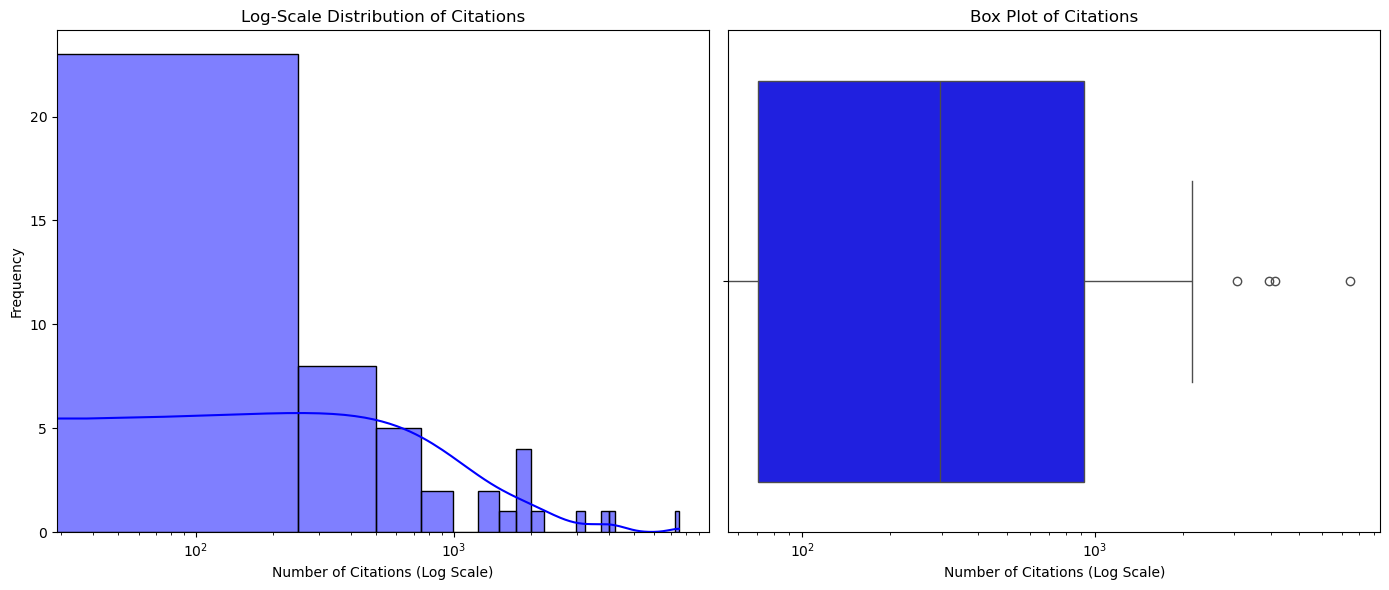

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_datasets['Number of citations (Google Scholar)'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_title('Log-Scale Distribution of Citations')
axes[0].set_xlabel('Number of Citations (Log Scale)')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_datasets['Number of citations (Google Scholar)'], color='blue', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Box Plot of Citations')
axes[1].set_xlabel('Number of Citations (Log Scale)')

plt.tight_layout() 
plt.show()

In [39]:
print("Top 10 most cited datasets:")
print(df_datasets.nlargest(10, 'Number of citations (Google Scholar)')[['Dataset', 'Number of citations (Google Scholar)']])

Top 10 most cited datasets:
                                              Dataset  \
5                                         LibriSpeech   
39                                            IEMOCAP   
0                                            AudioSet   
20  EmoDB Dataset (Berlin Database of Emotional Sp...   
34  RAVDESS (Ryerson Audio-Visual Database of Emot...   
13                                    Speech Commands   
4                                              ESC-50   
40                                          WSJ0-2mix   
8                                        Common Voice   
3                                        UrbanSound8K   

    Number of citations (Google Scholar)  
5                                 7494.0  
39                                4124.0  
0                                 3950.0  
20                                3072.0  
34                                2154.0  
13                                1882.0  
4                                 1872.0  


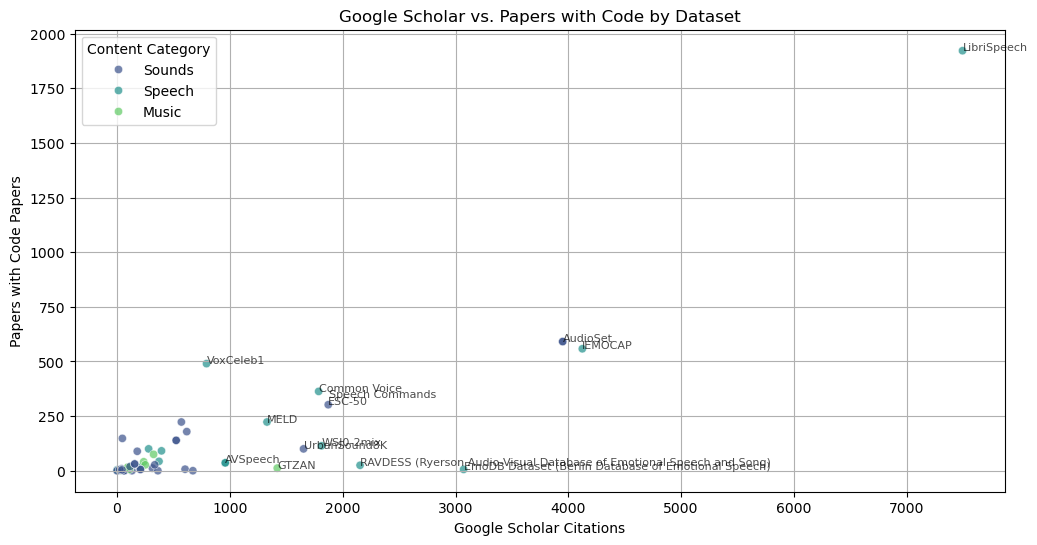

In [41]:
plt.figure(figsize=(12, 6))

plot = scatterplot_X_vs_Y(df_datasets_clean_with_duplicates, x='Number of citations (Google Scholar)', y='Number of Papers (Papers with code since 2020)',
                          title='Google Scholar vs. Papers with Code by Dataset', xlabel='Google Scholar Citations', ylabel='Papers with Code Papers', 
                          ishue=True, hue='Music/Speech/Sounds', islegend=True, legend_title='Content Category', show_text_if_more_than_x=700) 
plt.show()

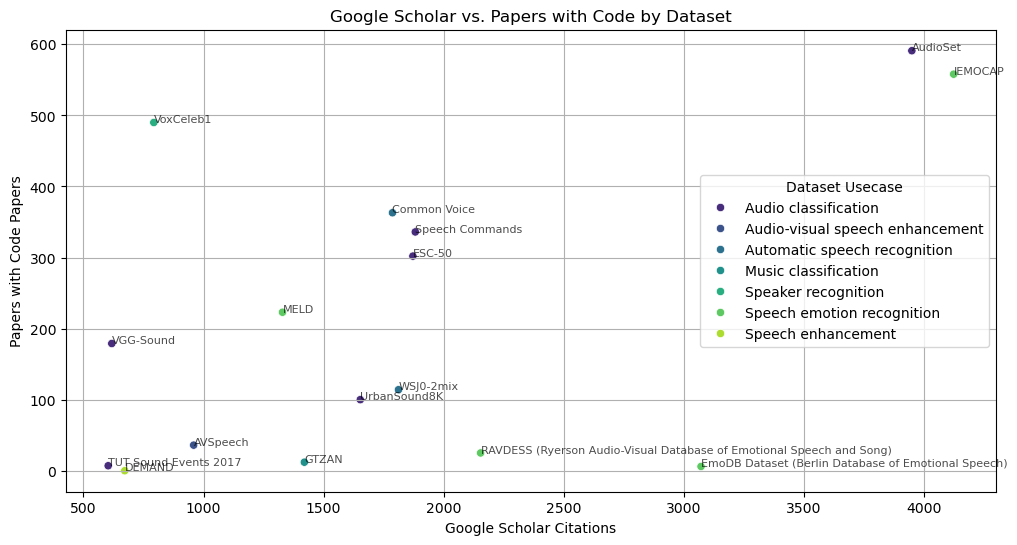

In [46]:
plt.figure(figsize=(12, 6))

plot = scatterplot_X_vs_Y_in_range(df_datasets, x='Number of citations (Google Scholar)', y='Number of Papers (Papers with code since 2020)',
                                   title='Google Scholar vs. Papers with Code by Dataset', xlabel='Google Scholar Citations', 
                                   ylabel='Papers with Code Papers', lower_boundery=600, upper_boundery=5000, ishue=True, hue='Original Use Case', 
                                   islegend=True, legend_title='Dataset Usecase')

plt.show()

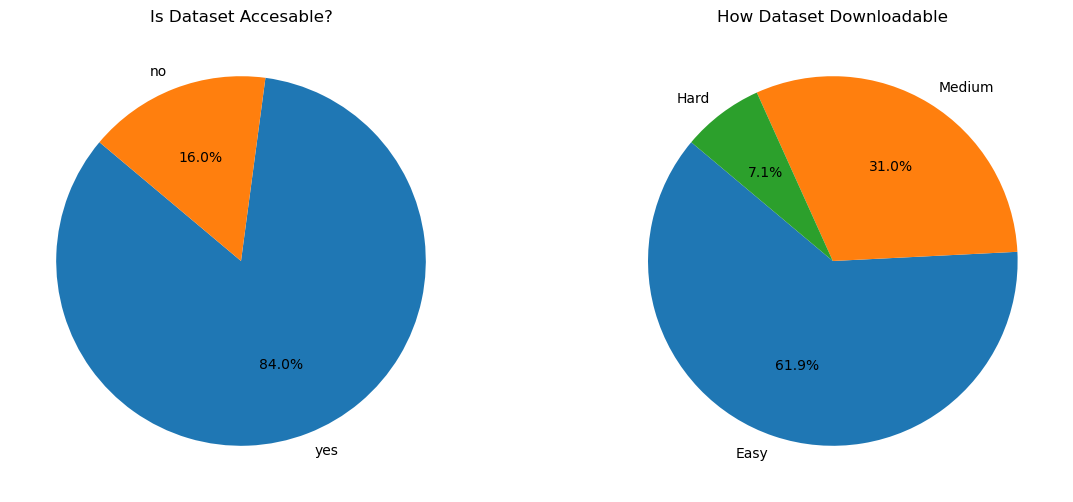

In [50]:
accessable_datasets = df_datasets['Accessable'].value_counts()
downloadable_datasets = df_datasets['Downloadable'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(accessable_datasets, labels=accessable_datasets.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Is Dataset Accesable?')

axes[1].pie(downloadable_datasets, labels=downloadable_datasets.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('How Dataset Downloadable')

plt.show()

### Explore Classification Datasets

In [55]:
df_datasets_original_classification = df_datasets[df_datasets['Original Use Case'].str.contains('Audio classification', na=False)]

In [57]:
# top 5 most cited datasets
most_cited = df_datasets_original_classification.nlargest(5, 'Number of citations (Google Scholar)')
print("\nTop 5 Most Cited Datasets:\n")
print(most_cited[['Dataset', 'Number of citations (Google Scholar)']])

# top 5 most used datasets
most_used = df_datasets_original_classification.nlargest(5, 'Number of Papers (Papers with code since 2020)')
print("\nTop 5 Most Number of Papers (Papers with code since 2020) Datasets:\n")
print(most_used[['Dataset', 'Number of Papers (Papers with code since 2020)']])

# datasets by category
category_counts = df_datasets_original_classification['Music/Speech/Sounds'].value_counts()
print("\nDatasets by Category:\n")
print(category_counts)

# datasets sum size
size_counts = df_datasets_original_classification['Size (Hours)'].sum()
print("\nSize (Hours):\n")
print(size_counts)


Top 5 Most Cited Datasets:

            Dataset  Number of citations (Google Scholar)
0          AudioSet                                3950.0
13  Speech Commands                                1882.0
4            ESC-50                                1872.0
3      UrbanSound8K                                1653.0
6         VGG-Sound                                 618.0

Top 5 Most Number of Papers (Papers with code since 2020) Datasets:

                            Dataset  \
0                          AudioSet   
13                  Speech Commands   
4                            ESC-50   
6                         VGG-Sound   
22  EPIC-SOUNDS (EPIC-KITCHENS-100)   

    Number of Papers (Papers with code since 2020)  
0                                            591.0  
13                                           336.0  
4                                            302.0  
6                                            179.0  
22                                           148.0  


In [59]:
df_datasets_filtered_classification_1 = extract_by_features(df_datasets, 
                               ['Original Use Case', 'Accessable', 'Downloadable'], 
                               ['Audio classification', 'yes', 'Easy'],
                               ['Score or best score in Paper', 'Best Scoure']
                              )

In [61]:
df_datasets_filtered_classification_1

,Dataset,Number of citations (Google Scholar),Number of Papers (Papers with code since 2020),Number of Evaluations (Papers with code API),Music/Speech/Sounds,Link,Paper Link,Model in Paper (Paper Link if Link Model Paper == null),Score or best score in Paper,Metrics in Paper,...,Size (Hours),Contents based on,Source,Language,Number of Benchmarks (Audio Classification or Recognition Papers with Code different models),Best Scoure,Best Model related to scoure,Metrics related to scoure,Link Model Paper,Comment
3,UrbanSound8K,1653.0,100.0,4.0,Sounds,https://urbansounddataset.weebly.com/urbansoun...,https://www.justinsalamon.com/uploads/4/3/9/4/...,SVM,70.00,Accuracy,...,27607.0,audio clips,Freesound.org,NaN,4.0,98.05,FACE,Accuracy,https://arxiv.org/pdf/2303.03666v1,NaN
4,ESC-50,1872.0,302.0,540.0,Sounds,https://github.com/karolpiczak/ESC-50,https://dl.acm.org/doi/10.1145/2733373.2806390,NaN,NaN,NaN,...,28157.0,audio clips,Freesound.org,NaN,50.0,99.10,OmniVec2,Accuracy,https://paperswithcode.com/paper/omnivec2-a-no...,NaN
7,FSD50K,524.0,139.0,10.0,Sounds,https://zenodo.org/records/4060432,https://dl.acm.org/doi/10.1109/TASLP.2021.3133208,NaN,NaN,NaN,...,145.0,short video clips,Freesound.org; AudioSet,English,9.0,69.70,ONE-PEACE,mAP (mean Average Precision),https://arxiv.org/pdf/2305.11172v1,NaN
14,TAU2020,132.0,0.0,0.0,Sounds,https://zenodo.org/records/3670167,https://arxiv.org/abs/2006.01919,CNN (SELD),NaN,NaN,...,64.0,audio clips,Public area recordings,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Kinetics-700,179.0,89.0,38.0,Sounds,https://github.com/cvdfoundation/kinetics-dataset,https://arxiv.org/abs/2010.10864,I3D,80.00,Accuracy,...,1805.0,short video clips,Youtube,NaN,36.0,85.90,InternVideo2-6B,Top1 Accuracy,https://arxiv.org/pdf/2403.15377v4,Only Audio Task
45,COUGHVID,334.0,27.0,0.0,Sounds,https://c4science.ch/diffusion/10770/,https://www.nature.com/articles/s41597-021-009...,eXtreme Gradient Boosting (XGB)1,86.70,Accuracy,...,35.0,audio clips,Crowdsourcing,NaN,NaN,0.70,OPERA-CT,MRR,https://arxiv.org/pdf/2406.16148v3,NaN
47,Cat Meow,0.0,0.0,0.0,Sounds,https://www.kaggle.com/datasets/andrewmvd/cat-...,https://d1wqtxts1xzle7.cloudfront.net/94765084...,RandomForestClassifier,0.73,F1,...,0.3,audio clips,Recoding,NaN,NaN,NaN,NaN,NaN,https://www.kaggle.com/code/kanyaratp29/csc287...,NaN
48,CochlScene,22.0,4.0,2.0,Sounds,https://zenodo.org/records/7080122,https://arxiv.org/abs/2211.02289,NaN,NaN,NaN,...,211.5,audio clips,Crowdsourcing,NaN,2.0,83.00,NVIDIA Audio Flamingo,Accuracy,https://arxiv.org/pdf/2402.01831v3,NaN


In [63]:
df_datasets_filtered_classification_2 = extract_by_features(df_datasets, 
                               ['Original Use Case', 'Accessable', 'Downloadable'], 
                               ['Audio classification', 'yes', 'Medium'],
                               ['Score or best score in Paper', 'Best Scoure']
                              )

In [65]:
df_datasets_filtered_classification_2

,Dataset,Number of citations (Google Scholar),Number of Papers (Papers with code since 2020),Number of Evaluations (Papers with code API),Music/Speech/Sounds,Link,Paper Link,Model in Paper (Paper Link if Link Model Paper == null),Score or best score in Paper,Metrics in Paper,...,Size (Hours),Contents based on,Source,Language,Number of Benchmarks (Audio Classification or Recognition Papers with Code different models),Best Scoure,Best Model related to scoure,Metrics related to scoure,Link Model Paper,Comment
13,Speech Commands,1882.0,336.0,16.0,Speech,https://huggingface.co/datasets/google/speech_...,https://arxiv.org/pdf/1804.03209,CNN,88.00,Top One Accuracy,...,616.0,audio clips,NaN,English,7.0,98.3,EAT,Accuracy,https://arxiv.org/pdf/2401.03497v1,NaN
15,TUT Sound Events 2017,603.0,7.0,0.0,Sounds,https://zenodo.org/records/400515,https://homepages.tuni.fi/tuomas.virtanen/pape...,NaN,61.00,Accuracy,...,24.0,audio clips,Public area recordings,NaN,1.0,64.9,Qwen-Audio,Accuracy,https://arxiv.org/pdf/2311.07919v2,NaN
21,SEP-28k,118.0,18.0,0.0,Speech,https://github.com/apple/ml-stuttering-events-...,https://arxiv.org/pdf/2102.12394,ConvLSTM,66.80,Accuracy,...,23.0,audio clips,Podcasts,English,NaN,NaN,NaN,NaN,NaN,NaN
22,EPIC-SOUNDS (EPIC-KITCHENS-100),47.0,148.0,2.0,Sounds,https://epic-kitchens.github.io/epic-sounds/,https://arxiv.org/pdf/2302.00646,MTCN?,30.80,mAP (mean Average Precision),...,100.0,audio clips,Recoding,NaN,4.0,46.0,"Audiovisual Masked Autoencoder (Audiovisual, S...",\tAccuracy,https://arxiv.org/pdf/2212.05922v3,Action classification based on audio
42,Coswara Dataset,362.0,0.0,0.0,Sounds,https://github.com/iiscleap/Coswara-Data,https://arxiv.org/abs/2005.10548,NaN,NaN,NaN,...,NaN,audio clips,Crowdsourcing,NaN,NaN,99.0,CNN (leave-one-out),Accuracy,https://dergipark.org.tr/en/download/article-f...,NaN
49,SONYC-UST-V2,44.0,4.0,0.0,Sounds,https://zenodo.org/records/3966543,https://arxiv.org/abs/2009.05188,baseline classifier with STC,0.83,label-weighted\nlabel-ranking average precisio...,...,51.4,audio clips,Recoding,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_datasets_filtered_classification_2[['Dataset', 'Download Comment']]

,Dataset,Download Comment
13,Speech Commands,Not direct
15,TUT Sound Events 2017,Not direct
21,SEP-28k,Not direct
22,EPIC-SOUNDS (EPIC-KITCHENS-100),Videos
42,Coswara Dataset,File format
49,SONYC-UST-V2,File format
